In [53]:
import requests
import pandas as pd
import numpy as np
import sqlite3 as lite
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import time
from dateutil.parser import parse
import collections

%matplotlib inline

In [2]:
r = requests.get('http://www.citibikenyc.com/stations/json')

In [21]:
r.json()['stationBeanList']

[{u'altitude': u'',
  u'availableBikes': 1,
  u'availableDocks': 37,
  u'city': u'',
  u'id': 72,
  u'landMark': u'',
  u'lastCommunicationTime': u'2016-06-22 05:34:48 PM',
  u'latitude': 40.76727216,
  u'location': u'',
  u'longitude': -73.99392888,
  u'postalCode': u'',
  u'stAddress1': u'W 52 St & 11 Ave',
  u'stAddress2': u'',
  u'stationName': u'W 52 St & 11 Ave',
  u'statusKey': 1,
  u'statusValue': u'In Service',
  u'testStation': False,
  u'totalDocks': 39},
 {u'altitude': u'',
  u'availableBikes': 23,
  u'availableDocks': 8,
  u'city': u'',
  u'id': 79,
  u'landMark': u'',
  u'lastCommunicationTime': u'2016-06-22 05:33:22 PM',
  u'latitude': 40.71911552,
  u'location': u'',
  u'longitude': -74.00666661,
  u'postalCode': u'',
  u'stAddress1': u'Franklin St & W Broadway',
  u'stAddress2': u'',
  u'stationName': u'Franklin St & W Broadway',
  u'statusKey': 1,
  u'statusValue': u'In Service',
  u'testStation': False,
  u'totalDocks': 33},
 {u'altitude': u'',
  u'availableBikes': 1

See how many stations there are in the data set

In [17]:
len(r.json()['stationBeanList'])

507

Create list of keys

In [19]:
key_list = []
for station in r.json()['stationBeanList']:
    for k in station.keys():
        if k not in key_list:
            key_list.append(k)
print(key_list)

[u'availableDocks', u'totalDocks', u'city', u'altitude', u'stAddress2', u'longitude', u'lastCommunicationTime', u'postalCode', u'statusValue', u'testStation', u'stAddress1', u'stationName', u'landMark', u'latitude', u'statusKey', u'availableBikes', u'id', u'location']


“Normalize” semi-structured JSON data into a flat table

In [22]:
df = json_normalize(r.json()['stationBeanList'])

In [23]:
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,1,37,,72,,2016-06-22 05:34:48 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,23,8,,79,,2016-06-22 05:33:22 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,18,9,,82,,2016-06-22 05:34:56 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,37,24,,83,,2016-06-22 05:32:49 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,3,30,,116,,2016-06-22 05:33:39 PM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39


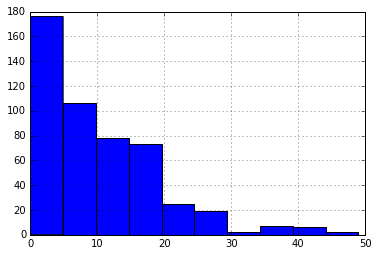

In [27]:
df[df.statusValue == "In Service"]['availableBikes'].hist()

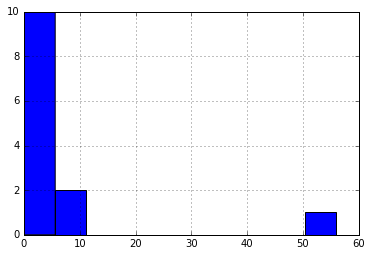

In [29]:
df[df.statusValue == "Not In Service"]['availableBikes'].hist()

In [28]:
df.statusValue.unique()

array([u'In Service', u'Not In Service'], dtype=object)

In [30]:
df.totalDocks.mean()

32.61932938856016

In [31]:
df[df.statusValue == 'In Service'].totalDocks.mean()

32.949392712550605

In [32]:
df[df.statusValue == 'Not In Service'].totalDocks.mean()

20.076923076923077

Begin storing data into SQLite3

In [44]:
sql = "INSERT INTO citibike_reference (id, totalDocks, city, altitude, stAddress2, longitude, postalCode, testStation, stAddress1, stationName, landMark, latitude, location) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)"

In [47]:
con = lite.connect('citibike.db')
cur = con.cursor()

with con:
    for station in r.json()['stationBeanList']:
        cur.execute(sql,(station['id'],station['totalDocks'],station['city'],station['altitude'],station['stAddress2'],station['longitude'],station['postalCode'],station['testStation'],station['stAddress1'],station['stationName'],station['landMark'],station['latitude'],station['location']))

In [48]:
station_ids = df['id'].tolist() 

In [49]:
station_ids

[72,
 79,
 82,
 83,
 116,
 119,
 120,
 127,
 128,
 137,
 143,
 144,
 146,
 147,
 150,
 151,
 152,
 153,
 157,
 161,
 164,
 167,
 168,
 173,
 174,
 195,
 212,
 216,
 217,
 223,
 224,
 225,
 228,
 229,
 232,
 233,
 236,
 237,
 238,
 239,
 241,
 242,
 243,
 244,
 245,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 270,
 274,
 275,
 276,
 278,
 279,
 280,
 281,
 282,
 284,
 285,
 289,
 291,
 293,
 295,
 296,
 297,
 298,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 315,
 316,
 317,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 334,
 335,
 336,
 337,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 372,
 373,
 376,
 377,
 379,
 380,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 3

In [50]:
station_ids = ['_' + str(x) + ' INT' for x in station_ids]

In [51]:
station_ids

['_72 INT',
 '_79 INT',
 '_82 INT',
 '_83 INT',
 '_116 INT',
 '_119 INT',
 '_120 INT',
 '_127 INT',
 '_128 INT',
 '_137 INT',
 '_143 INT',
 '_144 INT',
 '_146 INT',
 '_147 INT',
 '_150 INT',
 '_151 INT',
 '_152 INT',
 '_153 INT',
 '_157 INT',
 '_161 INT',
 '_164 INT',
 '_167 INT',
 '_168 INT',
 '_173 INT',
 '_174 INT',
 '_195 INT',
 '_212 INT',
 '_216 INT',
 '_217 INT',
 '_223 INT',
 '_224 INT',
 '_225 INT',
 '_228 INT',
 '_229 INT',
 '_232 INT',
 '_233 INT',
 '_236 INT',
 '_237 INT',
 '_238 INT',
 '_239 INT',
 '_241 INT',
 '_242 INT',
 '_243 INT',
 '_244 INT',
 '_245 INT',
 '_247 INT',
 '_248 INT',
 '_249 INT',
 '_250 INT',
 '_251 INT',
 '_252 INT',
 '_253 INT',
 '_254 INT',
 '_257 INT',
 '_258 INT',
 '_259 INT',
 '_260 INT',
 '_261 INT',
 '_262 INT',
 '_263 INT',
 '_264 INT',
 '_265 INT',
 '_266 INT',
 '_267 INT',
 '_268 INT',
 '_270 INT',
 '_274 INT',
 '_275 INT',
 '_276 INT',
 '_278 INT',
 '_279 INT',
 '_280 INT',
 '_281 INT',
 '_282 INT',
 '_284 INT',
 '_285 INT',
 '_289 INT',
 '_

In [52]:
with con:
    cur.execute("CREATE TABLE available_bikes ( execution_time INT, " +  ", ".join(station_ids) + ");")

In [54]:
exec_time = parse(r.json()['executionTime'])

In [55]:
exec_time

datetime.datetime(2016, 6, 22, 17, 35, 25)

In [56]:
with con:
    cur.execute('INSERT INTO available_bikes (execution_time) VALUES (?)', (exec_time.strftime('%s'),))

In [57]:
id_bikes = collections.defaultdict(int)

In [58]:
id_bikes

defaultdict(int, {})

In [59]:
for station in r.json()['stationBeanList']:
    id_bikes[station['id']] = station['availableBikes']

In [60]:
id_bikes

defaultdict(int,
            {72: 1,
             79: 23,
             82: 18,
             83: 37,
             116: 3,
             119: 9,
             120: 7,
             127: 1,
             128: 16,
             137: 15,
             143: 7,
             144: 11,
             146: 0,
             147: 27,
             150: 6,
             151: 29,
             152: 6,
             153: 1,
             157: 14,
             161: 10,
             164: 15,
             167: 0,
             168: 23,
             173: 0,
             174: 0,
             195: 7,
             212: 22,
             216: 6,
             217: 18,
             223: 11,
             224: 3,
             225: 36,
             228: 26,
             229: 14,
             232: 3,
             233: 0,
             236: 15,
             237: 12,
             238: 16,
             239: 12,
             241: 8,
             242: 5,
             243: 29,
             244: 2,
             245: 19,
             247: 

In [61]:
with con:
    for k, v in id_bikes.iteritems():
        cur.execute("UPDATE available_bikes SET _" + str(k) + " = " + str(v) + " WHERE execution_time = " + exec_time.strftime('%s') + ";")